# Tilleggsoppgave 3 kapittel 4

### Bølgepakke i boks

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use("ggplot")

## Initialize Free Wave Packet

In [ ]:
x = np.linspace(0, L, 1000)

sigma = 10 * 1e-9
L = 200 * 1e-9
x0 = 50 * 1e-9

hbar = 1.055 * 1e-34
E = 0.2*1.602 * 1e-19
m = 9.109 * 1e-31

# p = np.sqrt(2*m*E)

In [ ]:
def wavepacket(sigma, x0, E, m, x):
    """
    The wave packet given in the task
    """
    p = np.sqrt(2*m*E)
    return np.pi**(-0.25)*np.sqrt(1.0/sigma) * np.exp(-(x-x0)**2/(2*sigma**2) + 1j*p*(x-x0)/hbar)


def psi_n(n, x, L):
    """
    Eigenfunctions (stationary states) of the particle in box
    """
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)


def E_n(n, m, L):
    """
    Eigenvalues (energies) of particle in box
    """
    return n**2*np.pi**2*hbar**2/(2*m*L**2)

In [ ]:
# Plotting some of the energy eigenfucntions of the particle in box
for n in range(1, 6):
    plt.plot(x, psi_n(n, x, L))
plt.xlabel(r"$x [nm]$", fontsize=16)
plt.ylabel(r"$\psi_n(x)$", rotation=0, labelpad=15, fontsize=16) 
plt.title("Stationary States")
plt.show()

In [ ]:
plt.plot(x, wavepacket(sigma, x0, E, m, x).real, label=r"$Re(\psi)$")
plt.plot(x, wavepacket(sigma, x0, E, m, x).imag, label=r"$Im(\psi)$")
plt.plot(x, np.abs(wavepacket(sigma, x0, E, m, x)), label=r"$|\psi|$")
plt.xlabel(r"$x [nm]$", fontsize=16)
plt.title("Wave Packet")
plt.legend()
plt.show()

In [ ]:
# Function which plots the wavepacket
def plot_wavepacket(sigma, x0, E, m, x):
    xmin = -50 
    xmax = 250 
    x = np.linspace(0, L, 1000)

    psi = wavepacket(sigma, x0, E, m, x)
    psi_2 = np.abs(psi)**2
    
    plt.figure()
    plt.plot(x * 1e9, psi_2, label=r"$|\psi(x)|^2$") 
    plt.xlabel(r"$x [nm]$", fontsize=16)
    plt.ylabel(r"$|\Psi(x)|^2$", rotation=0, labelpad=25, fontsize=16) 
    plt.xlim(xmin, xmax)
    plt.ylim(-1e7, 8e7)
    plt.axvspan(200, 250, fc='gray')
    plt.axvspan(-50, 0, fc='gray')
    plt.axhspan(0, -1e7, fc='gray')
    plt.legend(fontsize=14)
    plt.show()

In [ ]:
plot_wavepacket(sigma, x0, E, m, x)

## 3. Wave Packet in Well


In [ ]:
def trap(f, h):
    """
    Numeric integration with the trapezoidal rule
    """
    intgr = 0.5 * h * (f[0] + f[-1])
    for i in range(1, f.shape[0]-1):
        intgr = intgr + h * f[i]
    return intgr

In [ ]:
# Check normalization

psi = wavepacket(sigma, x0, E, m, x)
psi2 = np.abs(psi)**2

# Trapezoidal rule for integration
print(trap(psi2, np.abs(x[1] - x[0])))

# Simple rectangular integral approximation
print(psi2.sum() * np.abs(x[1] - x[0]))

### 3.1 Estimating the Coefficients

In [ ]:
# Number of terms in linear combination
N = 180
n_list = np.linspace(1, N, N)

x = np.linspace(0, L, 1000)
psi = wavepacket(sigma, x0, E, m, x)
psi_2 = np.abs(psi) ** 2


# Determine coefficients
cns = np.empty(shape=n_list.shape, dtype="complex128")
for n in n_list:
    cn = trap(np.conj(psi_n(n, x, L)) * psi, np.abs(x[1]-x[0]))
    cns[int(n-1)] = cn
   
# Making the linear combination

P = np.zeros(shape=psi.shape, dtype="complex128")
norm = (np.abs(cns)**2).sum()
for n, cn in zip(n_list, cns):
    P += cn/norm * psi_n(n, x, L)
    
plt.plot(x * 1e9, np.abs(P)**2, label=f"$|\sum c_n \psi_n|^2$")
plt.plot(x * 1e9, psi_2, label=f"$|\psi|^2$")
plt.xlabel(r"$x [nm]$", fontsize=16)
plt.ylabel(r"$|\Psi(x)|^2$", rotation=0, labelpad=25, fontsize=16)
plt.legend(fontsize=14)
plt.title(f"N={N}", fontsize=16)
plt.show()

In [7]:
# Number of terms in linear combination
N = 180
n_list = np.linspace(1, N, N)

x = np.linspace(0, L, 1000)
psi = wavepacket(sigma, x0, E, m, x)
psi_2 = np.abs(psi) ** 2


# Determine coefficients
cns = np.empty(shape=n_list.shape, dtype="complex128")
for n in n_list:
    cn = trap(np.conj(psi_n(n, x, L)) * psi, np.abs(x[1]-x[0]))
    cns[int(n-1)] = cn
   
# Making the linear combination

P = np.zeros(shape=psi.shape, dtype="complex128")
norm = (np.abs(cns)**2).sum()
for n, cn in zip(n_list, cns):
    P += cn/norm * psi_n(n, x, L)
    
plt.plot(x * 1e9, np.abs(P)**2, label=f"$|\sum c_n \psi_n|^2$")
plt.plot(x * 1e9, psi_2, label=f"$|\psi|^2$")
plt.xlabel(r"$x [nm]$", fontsize=16)
plt.ylabel(r"$|\Psi(x)|^2$", rotation=0, labelpad=25, fontsize=16)
plt.legend(fontsize=14)
plt.title(f"N={N}", fontsize=16)
plt.show()

In [4]:
def wavepacket(sigma, x0, E, m, x):
    """
    The wave packet given in the task
    """
    p = np.sqrt(2*m*E)
    return np.pi**(-0.25)*np.sqrt(1.0/sigma) * np.exp(-(x-x0)**2/(2*sigma**2) + 1j*p*(x-x0)/hbar)


def psi_n(n, x, L):
    """
    Eigenfunctions (stationary states) of the particle in box
    """
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)


def E_n(n, m, L):
    """
    Eigenvalues (energies) of particle in box
    """
    return n**2*np.pi**2*hbar**2/(2*m*L**2)

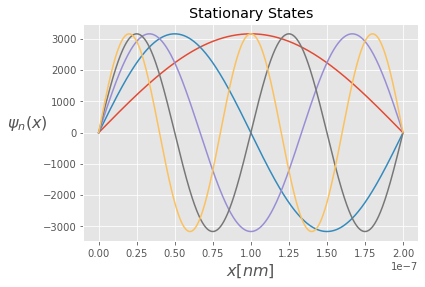

In [8]:
# Plotting some of the energy eigenfucntions of the particle in box
for n in range(1, 6):
    plt.plot(x, psi_n(n, x, L))
plt.xlabel(r"$x [nm]$", fontsize=16)
plt.ylabel(r"$\psi_n(x)$", rotation=0, labelpad=15, fontsize=16) 
plt.title("Stationary States")
plt.show()

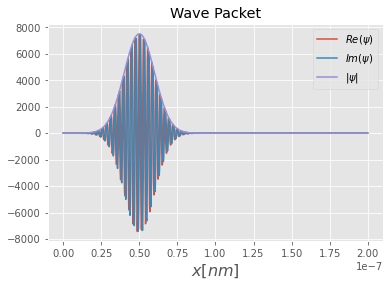

In [9]:
plt.plot(x, wavepacket(sigma, x0, E, m, x).real, label=r"$Re(\psi)$")
plt.plot(x, wavepacket(sigma, x0, E, m, x).imag, label=r"$Im(\psi)$")
plt.plot(x, np.abs(wavepacket(sigma, x0, E, m, x)), label=r"$|\psi|$")
plt.xlabel(r"$x [nm]$", fontsize=16)
plt.title("Wave Packet")
plt.legend()
plt.show()

In [10]:
# Function which plots the wavepacket
def plot_wavepacket(sigma, x0, E, m, x):
    xmin = -50 
    xmax = 250 
    x = np.linspace(0, L, 1000)

    psi = wavepacket(sigma, x0, E, m, x)
    psi_2 = np.abs(psi)**2
    
    plt.figure()
    plt.plot(x * 1e9, psi_2, label=r"$|\psi(x)|^2$") 
    plt.xlabel(r"$x [nm]$", fontsize=16)
    plt.ylabel(r"$|\Psi(x)|^2$", rotation=0, labelpad=25, fontsize=16) 
    plt.xlim(xmin, xmax)
    plt.ylim(-1e7, 8e7)
    plt.axvspan(200, 250, fc='gray')
    plt.axvspan(-50, 0, fc='gray')
    plt.axhspan(0, -1e7, fc='gray')
    plt.legend(fontsize=14)
    plt.show()

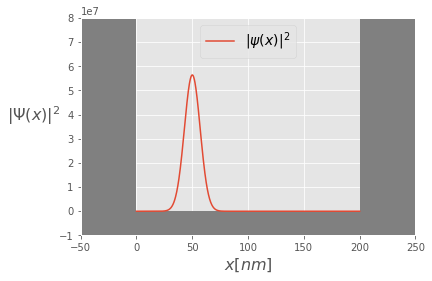

In [11]:
plot_wavepacket(sigma, x0, E, m, x)

## 3. Wave Packet in Well


In [12]:
def trap(f, h):
    """
    Numeric integration with the trapezoidal rule
    """
    intgr = 0.5 * h * (f[0] + f[-1])
    for i in range(1, f.shape[0]-1):
        intgr = intgr + h * f[i]
    return intgr

In [13]:
# Check normalization

psi = wavepacket(sigma, x0, E, m, x)
psi2 = np.abs(psi)**2

# Trapezoidal rule for integration
print(trap(psi2, np.abs(x[1] - x[0])))

# Simple rectangular integral approximation
print(psi2.sum() * np.abs(x[1] - x[0]))

0.9999999999992281
0.9999999999993071


### 3.1 Estimating the Coefficients

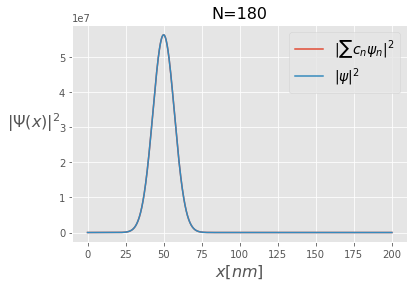

In [14]:
# Number of terms in linear combination
N = 180
n_list = np.linspace(1, N, N)

x = np.linspace(0, L, 1000)
psi = wavepacket(sigma, x0, E, m, x)
psi_2 = np.abs(psi) ** 2


# Determine coefficients
cns = np.empty(shape=n_list.shape, dtype="complex128")
for n in n_list:
    cn = trap(np.conj(psi_n(n, x, L)) * psi, np.abs(x[1]-x[0]))
    cns[int(n-1)] = cn
   
# Making the linear combination

P = np.zeros(shape=psi.shape, dtype="complex128")
norm = (np.abs(cns)**2).sum()
for n, cn in zip(n_list, cns):
    P += cn/norm * psi_n(n, x, L)
    
plt.plot(x * 1e9, np.abs(P)**2, label=f"$|\sum c_n \psi_n|^2$")
plt.plot(x * 1e9, psi_2, label=f"$|\psi|^2$")
plt.xlabel(r"$x [nm]$", fontsize=16)
plt.ylabel(r"$|\Psi(x)|^2$", rotation=0, labelpad=25, fontsize=16)
plt.legend(fontsize=14)
plt.title(f"N={N}", fontsize=16)
plt.show()